In [2]:
import numpy as np
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import LeNet5

## torch.nn.init module

### kaiming uniform

验证 kaiming uniform 的计算方式，验证对象：

- Linear 层
- Conv2d 层

#### Linear Layer

In [3]:
linear1 = nn.Linear(30, 20) # 30 dim in, 20 dim out.
l = linear1.weight.size()
print(l)

torch.Size([20, 30])


##### Make histogram for weight to observe its distribution

In [4]:
w = linear1.weight.view((-1,1)).detach().numpy()
print(w.shape)

(600, 1)


In [5]:
hist, bin_edges = np.histogram(w, density=True)

(array([62., 45., 71., 30., 59., 53., 52., 51., 59., 62., 56.]),
 array([-0.18137467, -0.14830387, -0.11523306, -0.08216226, -0.04909146,
        -0.01602066,  0.01705015,  0.05012095,  0.08319175,  0.11626256,
         0.14933336,  0.18240416], dtype=float32),
 <a list of 11 Patch objects>)

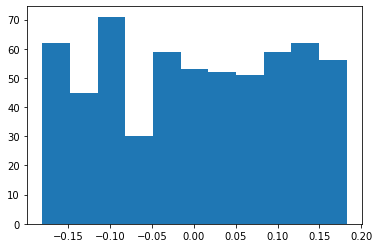

In [6]:
plt.hist(w, bins='auto')  # arguments are passed to np.histogram

##### Estimate the bound paramater

In [7]:
print(np.min(w), np.max(w))

-0.18137467 0.18240416


##### Conclusion

Linear层初始化后weight是均匀分布。

In [8]:
input_dim = linear1.weight.size(1) # input_dim
print(input_dim)

30


In [9]:
assumed_bound = math.sqrt(1/input_dim)
print(assumed_bound)

0.18257418583505536


#### Conv2d layer

In [10]:
conv1 = nn.Conv2d(1, 6, 5, padding=2)  # conv1 of LeNet-5

In [13]:
w = conv1.weight
print(w.size()) # torch.Size([6, 1, 5, 5]), (out_channels, in_channels/groups, kernel_size[0], kernel_size[1])

torch.Size([6, 1, 5, 5])


In [15]:
w = conv1.weight.view((-1,1)).detach().numpy()

(array([15., 19., 16., 11., 22., 16., 13., 21., 17.]),
 array([-0.19927588, -0.15493324, -0.11059061, -0.06624798, -0.02190534,
         0.0224373 ,  0.06677993,  0.11112256,  0.1554652 ,  0.19980784],
       dtype=float32),
 <a list of 9 Patch objects>)

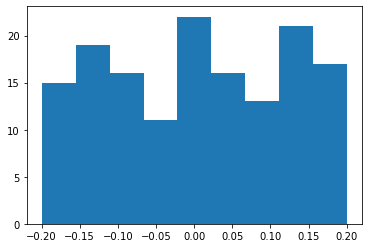

In [17]:
plt.hist(w, bins='auto')  # arguments are passed to np.histogram

In [18]:
np.max(w)

0.19980784

In [19]:
C_in = 1
kernel_size = 5
assumed_bound = math.sqrt(1/(C_in*kernel_size*kernel_size))
print(assumed_bound)

0.2
